In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('demo.csv')

# Display the first few rows of the DataFrame
print(df.head())


   applicant_salary  father_salary  mother_salary loan_approved
0             50000          75000          60000           yes
1             60000          70000          55000           yes
2             70000          80000          65000            no
3             45000          60000          50000            no
4             80000          90000          75000           yes


Iteration 0: Cost = 0.6928193926671293
Iteration 100: Cost = 0.6814142869062608
Iteration 200: Cost = 0.6745144213391391
Iteration 300: Cost = 0.6698905762466834
Iteration 400: Cost = 0.666414632433485
Iteration 500: Cost = 0.6635431127199913
Iteration 600: Cost = 0.661017065815259
Iteration 700: Cost = 0.658709287192842
Iteration 800: Cost = 0.6565522942632259
Iteration 900: Cost = 0.6545058530141815


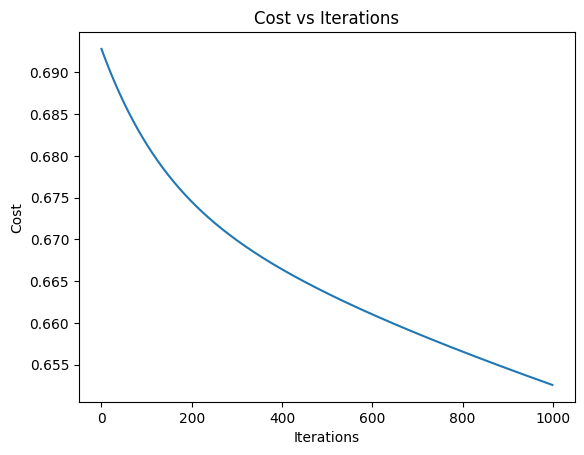

Accuracy: 42.86%


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('demo.csv')

# Separate features and labels
X = df[['applicant_salary', 'father_salary', 'mother_salary']].values
y = df['loan_approved'].apply(lambda x: 1 if x == 'yes' else 0).values.reshape(-1, 1)

# Normalize features
X_norm = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
split_ratio = 0.8
split_idx = int(len(df) * split_ratio)
X_train, X_test = X_norm[:split_idx], X_norm[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the forward propagation function for the neural network
def forward_propagation(X, W1, b1, W2, b2):
    # Layer 1
    Z1 = np.dot(X, W1) + b1
    a1 = sigmoid(Z1)

    # Layer 2
    Z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(Z2)

    return a1, a2  # Return a1 as well for backward propagation

# Define the backward propagation function for the neural network
def backward_propagation(X, y, a1, a2, W2):
    # Compute gradients for Layer 2
    dZ2 = a2 - y
    dW2 = np.dot(a1.T, dZ2) / len(X)
    db2 = np.mean(dZ2, axis=0)

    # Compute gradients for Layer 1
    dZ1 = np.dot(dZ2, W2.T) * (a1 * (1 - a1))  # Sigmoid derivative
    dW1 = np.dot(X.T, dZ1) / len(X)
    db1 = np.mean(dZ1, axis=0)

    return dW1, db1, dW2, db2

# Define the neural network training function using gradient descent
def train_neural_network(X, y, W1, b1, W2, b2, num_iterations, learning_rate):
    costs = []  # To store costs at each iteration

    for i in range(num_iterations):
        # Forward propagation
        a1, a2 = forward_propagation(X, W1, b1, W2, b2)

        # Compute cost
        cost = -np.mean(y * np.log(a2) + (1 - y) * np.log(1 - a2))
        costs.append(cost)

        # Backpropagation
        dW1, db1, dW2, db2 = backward_propagation(X, y, a1, a2, W2)

        # Update weights and biases
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2

        # Print cost every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost}")

    return W1, b1, W2, b2, costs

# Set hyperparameters for training the neural network
num_iterations = 1000
learning_rate = 0.01

# Define initial weights and biases for the neural network
input_size = X_train.shape[1]
hidden_size = 4  # You can adjust this as needed
output_size = 1
np.random.seed(0)
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# Train the neural network
W1, b1, W2, b2, costs = train_neural_network(X_train, y_train, W1, b1, W2, b2, num_iterations, learning_rate)

# Plot cost vs iterations curve
plt.plot(range(num_iterations), costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.show()

# Define the predict function using the learned parameters
def predict(X, W1, b1, W2, b2):
    a1, a2 = forward_propagation(X, W1, b1, W2, b2)
    return (a2 > 0.5).astype(int)

# Predict using the trained model on test data
y_pred = predict(X_test, W1, b1, W2, b2)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test) * 100

# Print accuracy
print(f"Accuracy: {accuracy:.2f}%")
